In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import scipy.sparse 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from timeit import timeit

In [2]:
# Matrix densities to test
D = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]

# Lists containing timeing results
sparse_times = []
dense_times = []

In [3]:
for density in D:
    # Choose CSR matrix because we want similarities between rows
    X_sparse = scipy.sparse.random(m=5000, n=20, format='csr', density=density, random_state=100)
    X_dense = X_sparse.todense()
        
    sparse_times.append( timeit(lambda: cosine_similarity(X_sparse, dense_output=False), number=5) ) 
    dense_times.append( timeit(lambda: cosine_similarity(X_dense), number=5) )

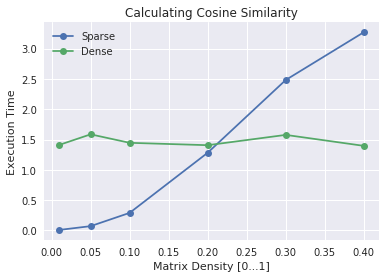

In [6]:
# Make plot

plt.title("Calculating Cosine Similarity")
plt.ylabel("Execution Time")
plt.xlabel("Matrix Density [0...1]")
plt.plot(D, sparse_times, '-o', label='Sparse')
plt.plot(D, dense_times, '-o', label='Dense')
plt.legend()

# plt.savefig("Benchmark.png")